Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [107]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os, cv2
import PIL
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.models import Sequential
from glob import glob

import warnings
warnings.filterwarnings("ignore")

In [108]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')
inputFile = '/content/gdrive/MyDrive/UpGrad MS/AIML Course Content/My Notes/Neural Networks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration'

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [109]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/UpGrad MS/AIML Course Content/My Notes/Neural Networks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/UpGrad MS/AIML Course Content/My Notes/Neural Networks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [110]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2240
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [112]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [113]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               seed=123,
                                                               validation_split=0.2,
                                                               image_size=(img_height,img_width),
                                                               batch_size=batch_size,
                                                               color_mode='rgb',
                                                               subset='training')

Found 2240 files belonging to 9 classes.
Using 1792 files for training.


In [114]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             seed=123,
                                                             validation_split=0.2,
                                                             image_size=(img_height,img_width),
                                                             batch_size=batch_size,
                                                             color_mode='rgb',
                                                             subset='validation')


Found 2240 files belonging to 9 classes.
Using 448 files for validation.


In [115]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

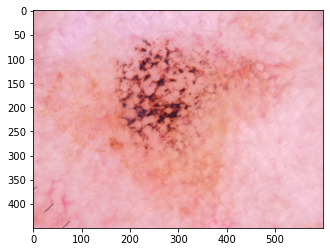

In [116]:
import matplotlib.pyplot as plt

### your code goes here, you can use training or validation data to visualize

image = plt.imread((list(data_dir_train.glob(class_names[0]+'/*.jpg'))[0]))
plt.imshow(image)

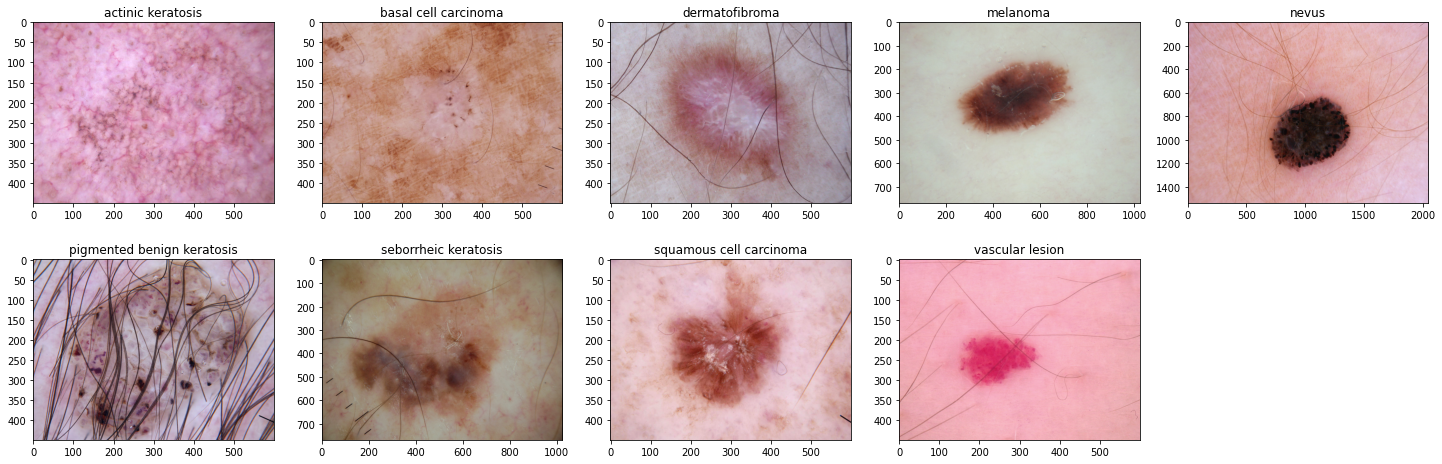

In [118]:
plt.figure(figsize=(25,8))
for i in range(len(class_names)):
  plt.subplot(2,5,i+1)
  image= plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [119]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [120]:
### Your code goes here
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [121]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [122]:
# View the summary of all layers
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_8 (Conv2D)           (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 90, 90, 64)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 45, 45, 128)      0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 259200)           

### Train the model

In [123]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 215s 792ms/step - loss: 3.3014 - accuracy: 0.1886 - val_loss: 2.0498 - val_accuracy: 0.2254
Epoch 2/20
56/56 [==============================] - 4s 69ms/step - loss: 1.8907 - accuracy: 0.2941 - val_loss: 1.8393 - val_accuracy: 0.3103
Epoch 3/20
56/56 [==============================] - 4s 69ms/step - loss: 1.6902 - accuracy: 0.4074 - val_loss: 1.6262 - val_accuracy: 0.4665
Epoch 4/20
56/56 [==============================] - 4s 69ms/step - loss: 1.5428 - accuracy: 0.4643 - val_loss: 1.5073 - val_accuracy: 0.4844
Epoch 5/20
56/56 [==============================] - 4s 68ms/step - loss: 1.3951 - accuracy: 0.4978 - val_loss: 1.3779 - val_accuracy: 0.5134
Epoch 6/20
56/56 [==============================] - 4s 68ms/step - loss: 1.2742 - accuracy: 0.5379 - val_loss: 1.3996 - val_accuracy: 0.5223
Epoch 7/20
56/56 [==============================] - 4s 69ms/step - loss: 1.1999 - accuracy: 0.5781 - val_loss: 1.5509 - val_accuracy: 0.5134
Epoch 8/20

### Visualizing training results

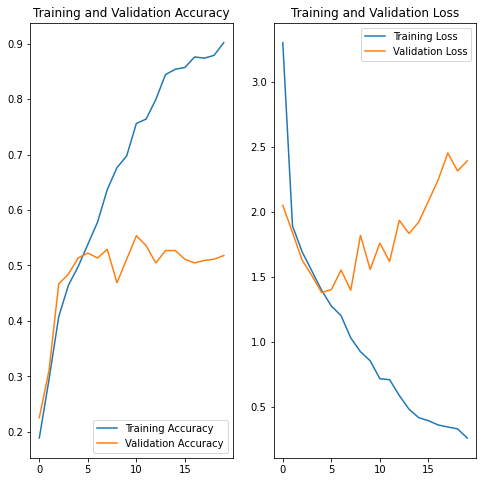

In [124]:
def plot_cnn_metrics(history,epochs):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs_range = range(epochs)

    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title('Training and Validation Accuracy')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title('Training and Validation Loss')
    plt.show()

plot_cnn_metrics(history,epochs)

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Write your findings here

1. Training accuracy increases over time, but validation accuracy gets stagnated at around 50%.
2. Similarly with respect to losses, raining loss keeps on decreasing but validation loss decreases and starts to increase as time passes
3. We have been able to achieve only 50% accuracy on the validation set and this graph clearly shows that there is overfitting happening

### Todo:
### Create the model, compile and train the model


In [125]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here

data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)


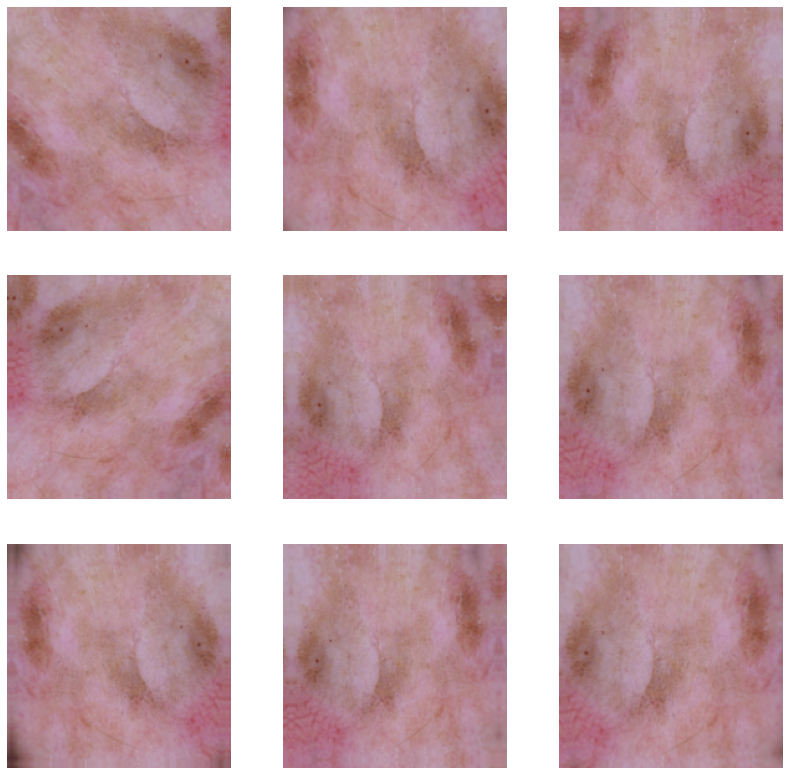

In [126]:
#Visualising the augmented images on our training dataset
plt.figure(figsize=(14, 14))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")

### Compiling the model

In [127]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))

# adding the augmentation layer before the convolution layer
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

In [128]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_5 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_6 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_10 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 90, 90, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 45, 45, 128)      0         
 g2D)                                                 

### Training the model

In [129]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)


Epoch 1/20


56/56 [==============================] - 17s 205ms/step - loss: 2.7279 - accuracy: 0.2500 - val_loss: 1.8408 - val_accuracy: 0.3438
Epoch 2/20
56/56 [==============================] - 10s 185ms/step - loss: 1.7309 - accuracy: 0.3823 - val_loss: 1.7841 - val_accuracy: 0.3415
Epoch 3/20
56/56 [==============================] - 11s 202ms/step - loss: 1.5141 - accuracy: 0.4626 - val_loss: 1.6853 - val_accuracy: 0.4219
Epoch 4/20
56/56 [==============================] - 11s 200ms/step - loss: 1.5354 - accuracy: 0.4654 - val_loss: 1.5988 - val_accuracy: 0.4241
Epoch 5/20
56/56 [==============================] - 11s 188ms/step - loss: 1.5325 - accuracy: 0.4559 - val_loss: 1.4441 - val_accuracy: 0.5223
Epoch 6/20
56/56 [==============================] - 10s 183ms/step - loss: 1.4355 - accuracy: 0.4821 - val_loss: 1.3766 - val_accuracy: 0.5067
Epoch 7/20
56/56 [==============================] - 12s 223ms/step - loss: 1.3769 - accuracy: 0.4972 - val_loss: 1.3908 - val_accuracy: 0.5045
Epoch 8/20

### Visualizing the results

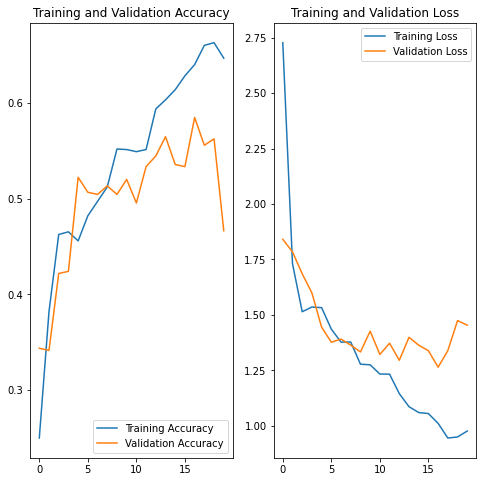

In [130]:
# Visualizing training results
plot_cnn_metrics(history,epochs)

## Findings
1. Training accuracy increases over time, but validation accuracy gets stagnated at around 50%.
2. Similarly with respect to losses, training loss keeps on decreasing but validation loss decreases and starts to stagnate as time passes
3. Compared to previous model, this model has achieved a closer validation and training accuracy
4. We have been able to achieve only 50% accuracy on the validation set and this graph clearly shows that there is overfitting happening

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [131]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

# Compiling the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_6 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_12 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 90, 90, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 45, 45, 128)      0         
 g2D)                                                 

In [132]:
# Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20


56/56 [==============================] - 19s 255ms/step - loss: 4.1069 - accuracy: 0.2338 - val_loss: 1.7715 - val_accuracy: 0.2879
Epoch 2/20
56/56 [==============================] - 13s 235ms/step - loss: 1.7327 - accuracy: 0.3728 - val_loss: 1.6419 - val_accuracy: 0.4598
Epoch 3/20
56/56 [==============================] - 14s 241ms/step - loss: 1.6235 - accuracy: 0.4241 - val_loss: 1.6329 - val_accuracy: 0.4129
Epoch 4/20
56/56 [==============================] - 13s 238ms/step - loss: 1.5829 - accuracy: 0.4459 - val_loss: 1.5366 - val_accuracy: 0.4732
Epoch 5/20
56/56 [==============================] - 13s 236ms/step - loss: 1.4425 - accuracy: 0.4911 - val_loss: 1.5628 - val_accuracy: 0.4710
Epoch 6/20
56/56 [==============================] - 13s 239ms/step - loss: 1.4130 - accuracy: 0.5061 - val_loss: 1.4299 - val_accuracy: 0.5089
Epoch 7/20
56/56 [==============================] - 13s 238ms/step - loss: 1.3646 - accuracy: 0.5212 - val_loss: 1.4545 - val_accuracy: 0.5045
Epoch 8/20

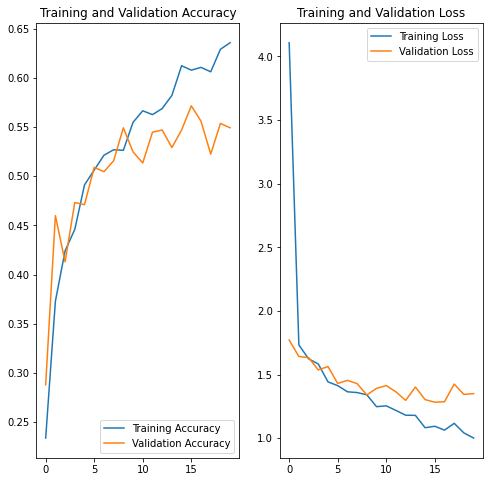

In [133]:
# Visualizing training results
plot_cnn_metrics(history,epochs)

## Findings
1. Training accuracy increases over time, but validation accuracy gets stagnated at around 55%.
2. Training and validation loss both decreases as time passes when compared to previous models
3. Compared to previous model, this model looks almost similar
4. Difference in accuracy cannot be improved any more and this seeems to be the best 
5. Overfitting has reduced a bit

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [134]:
# Visualising our data with respect to the classes present

for i in range(len(class_names)):
  print(class_names[i],' - ',len(list(data_dir_train.glob(class_names[i]+'/*.jpg'))))

actinic keratosis  -  114
basal cell carcinoma  -  376
dermatofibroma  -  95
melanoma  -  438
nevus  -  357
pigmented benign keratosis  -  463
seborrheic keratosis  -  77
squamous cell carcinoma  -  181
vascular lesion  -  139


## Class with least number of samples - seborrheic keratosis (77 samples)

## Class with the most number of samples - pigmented benign keratosis (462 samples)

In [135]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
'''
import glob
import Augmentor
filename="/content/gdrive/MyDrive/UpGrad MS/AIML Course Content/My Notes/Neural Networks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
for filename in glob.iglob('test',recursive=True):
    p = Augmentor.Pipeline(filename,output_directory="/content/gdrive/MyDrive/UpGrad MS/AIML Course Content/My Notes/Neural Networks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)
'''
'''
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)

    p.zoom(probability=0.3, min_factor=0.5, max_factor=1)
    p.flip_left_right(probability=0.4)
    p.flip_top_bottom(probability=0.8)
    p.skew(probability=0.5)
    p.shear(probability=0.5, max_shear_left=0.5, max_shear_right=0.5)
    p.random_distortion(probability=0.5, magnitude=1, grid_width=1, grid_height=1)
'''

In [ ]:
'''
path_to_training_dataset="/content/gdrive/MyDrive/UpGrad MS/AIML Course Content/My Notes/Neural Networks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train"
import Augmentor
p = Augmentor.Pipeline(path_to_training_dataset,output_directory="/content/gdrive/MyDrive/UpGrad MS/AIML Course Content/My Notes/Neural Networks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Output")
p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.
'''

In [140]:
path_to_training_dataset="/content/gdrive/MyDrive/UpGrad MS/AIML Course Content/My Notes/Neural Networks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.


Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad MS/AIML Course Content/My Notes/Neural Networks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FEAC855B8E0>: 100%|██████████| 500/500 [00:23<00:00, 21.49 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad MS/AIML Course Content/My Notes/Neural Networks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FEBBD243910>: 100%|██████████| 500/500 [00:22<00:00, 22.21 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad MS/AIML Course Content/My Notes/Neural Networks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEB2349D730>: 100%|██████████| 500/500 [00:22<00:00, 22.29 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad MS/AIML Course Content/My Notes/Neural Networks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FEB2C29F340>: 100%|██████████| 500/500 [02:06<00:00,  3.94 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad MS/AIML Course Content/My Notes/Neural Networks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7FEA300E3EE0>: 100%|██████████| 500/500 [01:38<00:00,  5.06 Samples/s]


Initialised with 463 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad MS/AIML Course Content/My Notes/Neural Networks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEB2C2BA160>: 100%|██████████| 500/500 [00:23<00:00, 21.42 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad MS/AIML Course Content/My Notes/Neural Networks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7FEA3007FDC0>: 100%|██████████| 500/500 [00:51<00:00,  9.69 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad MS/AIML Course Content/My Notes/Neural Networks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEB21F4D8E0>: 100%|██████████| 500/500 [00:21<00:00, 22.84 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/UpGrad MS/AIML Course Content/My Notes/Neural Networks/Melanoma Detection Assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FEB2346C0D0>: 100%|██████████| 500/500 [00:22<00:00, 21.77 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [141]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [142]:
from glob import glob
path_list = [x for x in glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]
#path_list

In [143]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob(os.path.join(data_dir_train, '*', 'output', '*.jpg'))]
#lesion_list_new

In [144]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [145]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [146]:
df2['Label'].value_counts()

dermatofibroma                500
seborrheic keratosis          500
vascular lesion               500
squamous cell carcinoma       500
actinic keratosis             500
basal cell carcinoma          500
nevus                         500
pigmented benign keratosis    500
melanoma                      500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [147]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [148]:
#data_dir_train="path to directory with training data + data created using augmentor"
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6740 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [149]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6740 files belonging to 9 classes.
Using 1348 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [150]:
# CNN Model
model=models.Sequential()
# scaling the pixel values from 0-255 to 0-1
model.add(layers.Rescaling(scale=1./255,input_shape=(180,180,3)))
model.add(data_augmentation)

# Convolution layer with 64 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(64,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())

# Convolution layer with 128 features, 3x3 filter and relu activation with 2x2 pooling
model.add(layers.Conv2D(128,(3,3),padding = 'same',activation='relu'))
model.add(layers.MaxPooling2D())
#adding a 20% dropout after the convolution layers
model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(9,activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [151]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 sequential_6 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_14 (Conv2D)          (None, 180, 180, 64)      1792      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 90, 90, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 90, 90, 128)       73856     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 45, 45, 128)      0         
 g2D)                                                 

#### **Todo:**  Train your model

In [152]:
# Training the model
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30


169/169 [==============================] - 70s 382ms/step - loss: 2.4197 - accuracy: 0.3038 - val_loss: 1.6952 - val_accuracy: 0.3323
Epoch 2/30
169/169 [==============================] - 64s 374ms/step - loss: 1.5554 - accuracy: 0.4125 - val_loss: 1.6067 - val_accuracy: 0.3687
Epoch 3/30
169/169 [==============================] - 68s 395ms/step - loss: 1.3815 - accuracy: 0.4761 - val_loss: 1.3615 - val_accuracy: 0.4748
Epoch 4/30
169/169 [==============================] - 70s 404ms/step - loss: 1.2976 - accuracy: 0.5048 - val_loss: 1.3660 - val_accuracy: 0.4874
Epoch 5/30
169/169 [==============================] - 74s 432ms/step - loss: 1.2306 - accuracy: 0.5412 - val_loss: 1.2669 - val_accuracy: 0.5282
Epoch 6/30
169/169 [==============================] - 68s 397ms/step - loss: 1.1382 - accuracy: 0.5710 - val_loss: 1.0710 - val_accuracy: 0.5868
Epoch 7/30
169/169 [==============================] - 67s 389ms/step - loss: 1.0765 - accuracy: 0.5985 - val_loss: 1.0404 - val_accuracy: 0.6

#### **Todo:**  Visualize the model results

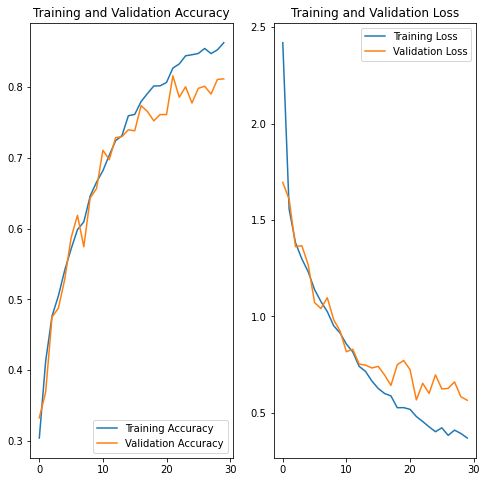

In [153]:
# Visualizing model results
plot_cnn_metrics(history,epochs)

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



## Findings
1. Training accuracy increases over time, and we see that validation accuracy also increases over time
2. Training and validation loss both decreases as time passes
3. Compared to previous model, this model has improved a lot. There is very less gap between training and valdiation accuracy
4. Class rebalancing has improved the accuracy from ~50% to ~80%